<h3>Looking into relationship between the number of gym, inactive rate, GSP, and health issue </h3>
<h4>Hypothesis:</h4>
<ul>
    <li>GSP (Gross State Product) can contribute to the state obesity rate.</li>
    
    <li>The higher of GSP means the wealthier of state => more time for gym and outdoor activities</li>
    <li> higher GSP, gyms, lower inactive rate => lower obesity rate </li>

</ul>

<h4>Test area</h4>
<ul>
    <li>USA</li>
    <li>Australia</li>
    <li>Europe</li>
    <li>Asia</li>
</ul>

In [11]:
import pandas
import matplotlib
%matplotlib inline

In [52]:
US_GSP = pandas.read_csv('US_GSP.csv')
US_inactiveRate = pandas.read_csv('US_inactive_rate.csv');
US_obesity = pandas.read_csv('US_obesity_rate.csv');

In [53]:
#First let's have a look at the 2015 data
US_states = US_GSP.States
GSP_2015 = US_GSP['2015']
inactive_2015 = US_inactiveRate['2015']
obesity_2015 = US_obesity['2015']

In [54]:
data2015 = pandas.DataFrame(
    {
        'states': US_states,
        'GSP': GSP_2015,
        'Inactive_rate': inactive_2015,
        'Obesity_rate': obesity_2015
    }
)

In [55]:
data2015.set_index('states')

,GSP,Inactive_rate,Obesity_rate
states,,,
Alabama,42.67,31.9,35.6
Alaska,81.80,22.0,29.8
Arizona,43.27,24.7,28.4
Arkansas,41.13,34.2,34.5
California,61.92,20.0,24.2
Colorado,58.01,17.9,20.2
Connecticut,72.33,23.5,25.3
Delaware,69.93,29.4,29.7
District of Columbia,181.19,19.4,22.1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119503c10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11996e950>]], dtype=object)

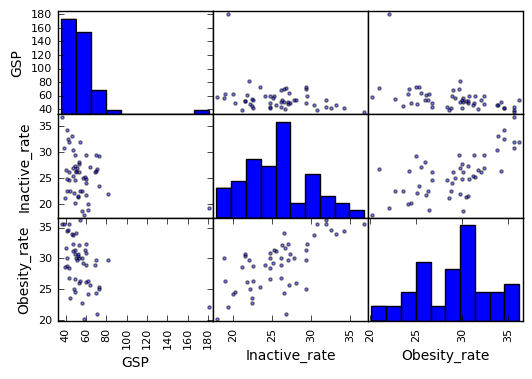

In [61]:
pandas.scatter_matrix(data2015)

<ul>
    <li>The higher of inactive rate, the high obesity rate</li>
    <li>Can't see much relationship between GSP and inactive rate</li>
</ul>

In [67]:
import sklearn.linear_model

In [69]:
ransac = sklearn.linear_model.RANSACRegressor()

In [70]:
X = data2015[ ['GSP', 'Inactive_rate'] ]
# prediction y-axis = price
y = data2015.Obesity_rate

In [71]:
ransac.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [74]:
ransac.estimator_.coef_

array([ 0.03146491,  0.86174987])

<ul>
    <li>It looks like as GSP increase, obesity rate also increase.  This is different from what I was assuming</li>
     <li>For every increase of Inactive rate, obesity rate also increase.  Align with my asummption</li>
        
</ul>

In [75]:
ols = sklearn.linear_model.LinearRegression()

In [76]:
X = data2015[ ['GSP', 'Inactive_rate'] ]
# prediction y-axis = price
y = data2015.Obesity_rate

In [77]:
ols.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
ols.coef_

array([-0.04774191,  0.56562818])

<p>Using Ordinary Least Square method</p>
<ul>
    <li>the increase of GSP will result of decrease in obesity rate</li>
    <li>the increase of inactive rate will result in increase of obesity rate</li>
</ul>
<p>Result aligns with my hyponthesis</p>

In [80]:
US_diabetes = pandas.read_csv('US_diabete.csv');
US_hypertension = pandas.read_csv('US_hypertension.csv');

In [81]:
data2015['Diabete_rate'] = US_diabetes['2015']
data2015['Hypertension_rate'] = US_hypertension['2015']

In [83]:
data2015.set_index('states')

,GSP,Inactive_rate,Obesity_rate,Diabete_rate,Hypertension_rate
states,,,,,
Alabama,42.67,31.9,35.6,13.5,40.4
Alaska,81.80,22.0,29.8,7.6,27.5
Arizona,43.27,24.7,28.4,10.1,30.8
Arkansas,41.13,34.2,34.5,12.6,39.3
California,61.92,20.0,24.2,10.0,28.5
Colorado,58.01,17.9,20.2,6.8,25.7
Connecticut,72.33,23.5,25.3,9.3,30.4
Delaware,69.93,29.4,29.7,11.5,34.5
District of Columbia,181.19,19.4,22.1,8.5,29.4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ff8e590>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1227befd0>]], dtype=object)

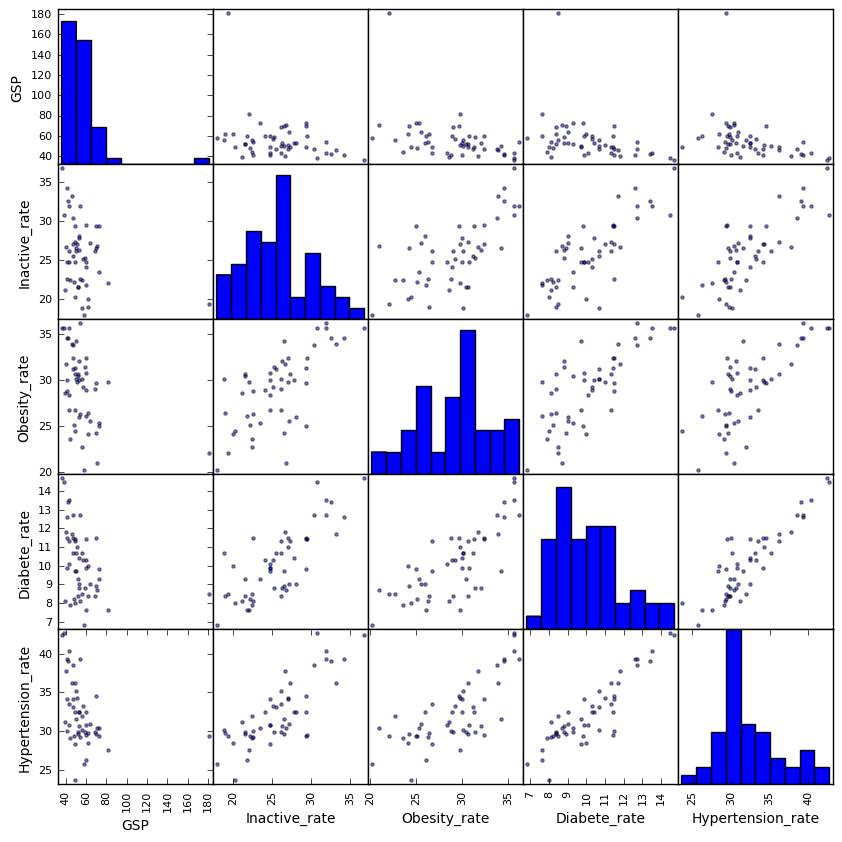

In [87]:
pandas.scatter_matrix(data2015, figsize = (10,10))

In [88]:
regressor = sklearn.linear_model.TheilSenRegressor()

In [89]:
X = data2015[ ['GSP', 'Inactive_rate', 'Diabete_rate', 'Hypertension_rate'] ]
# prediction y-axis = price
y = data2015.Obesity_rate

In [90]:
regressor.fit(X,y)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)

In [92]:
regressor.coef_

array([-0.04202165,  0.15158722,  0.81872253,  0.19646466])

In [93]:
ols = sklearn.linear_model.LinearRegression()

In [95]:
X = data2015[ ['GSP', 'Inactive_rate', 'Diabete_rate', 'Hypertension_rate'] ]
# prediction y-axis = price
y = data2015.Obesity_rate

In [96]:
ols.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
ols.coef_

array([-0.03399168,  0.12697257,  0.9078203 ,  0.19198792])

<p>Both model show that the following:</p>
<ul>
    <li>The increase of GSP (the richer of the people), the lower of obesity rate.  We can probably look into the number of gym memebership to confirm that.</li>
    <li>The increase of inactive rate, diabete rate, and hypertension rate contribute to the increase of obesity</li>
    
</ul>

In [99]:
obesity_prediction = ols.predict(X)

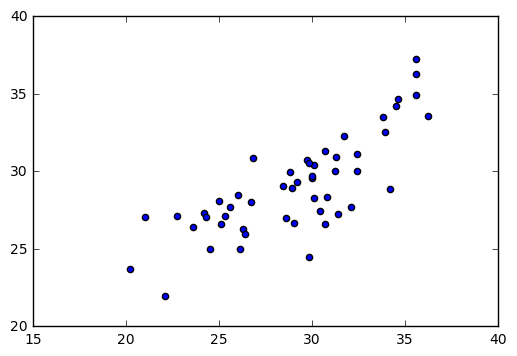

In [100]:
matplotlib.pyplot.scatter(data2015['Obesity_rate'], obesity_prediction)

<h3>Next Steps</h3>
<ul>
    <li>look into if the increase of GSP result in increase of gym membership</li>
    <li>look into if the increase of gym membership result in decrease of inactivite rate and obesity rate</li>
    <li>test the above with the states with the higher increase of GSP over the years (2012- 2015)</li>
    <li>check to see if the same trend also happen in Australia, Europe and Asia</li>
</ul